In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data loading and preprocessing
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def calculate_accuracy(net, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def train_network(net, trainloader, testloader, epochs=10, learning_rate=0.001, momentum=0.9):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

    train_accuracies = []
    test_accuracies = []
    iterations = []
    current_iteration = 0

    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, predicted_train = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

            current_iteration += 1
            if i % 2000 == 1999:    # Print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

        train_accuracy = 100 * correct_train / total_train
        test_accuracy = calculate_accuracy(net, testloader)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        iterations.append(epoch + 1)

        print(f'Epoch {epoch + 1} - Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

    return train_accuracies, test_accuracies, iterations

def plot_accuracy(train_acc, test_acc, iterations, title):
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, train_acc, label='Training Accuracy')
    plt.plot(iterations, test_acc, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Using device: cuda


100%|██████████| 170M/170M [00:13<00:00, 12.4MB/s]


[1,  2000] loss: 2.213
[1,  4000] loss: 2.169
[1,  6000] loss: 2.165
[1,  8000] loss: 2.157
[1, 10000] loss: 2.182
[1, 12000] loss: 2.162
Epoch 1 - Training Accuracy: 31.94%, Test Accuracy: 33.85%
[2,  2000] loss: 2.068
[2,  4000] loss: 2.124
[2,  6000] loss: 2.110
[2,  8000] loss: 2.149
[2, 10000] loss: 2.123
[2, 12000] loss: 2.156
Epoch 2 - Training Accuracy: 34.26%, Test Accuracy: 33.49%
[3,  2000] loss: 2.057
[3,  4000] loss: 2.099
[3,  6000] loss: 2.089
[3,  8000] loss: 2.125
[3, 10000] loss: 2.128
[3, 12000] loss: 2.129
Epoch 3 - Training Accuracy: 34.85%, Test Accuracy: 33.40%
[4,  2000] loss: 2.053
[4,  4000] loss: 2.077
[4,  6000] loss: 2.083
[4,  8000] loss: 2.103
[4, 10000] loss: 2.116
[4, 12000] loss: 2.109
Epoch 4 - Training Accuracy: 35.04%, Test Accuracy: 33.59%
[5,  2000] loss: 2.055
[5,  4000] loss: 2.073
[5,  6000] loss: 2.058
[5,  8000] loss: 2.096
[5, 10000] loss: 2.083
[5, 12000] loss: 2.107
Epoch 5 - Training Accuracy: 35.41%, Test Accuracy: 33.36%
[6,  2000] loss

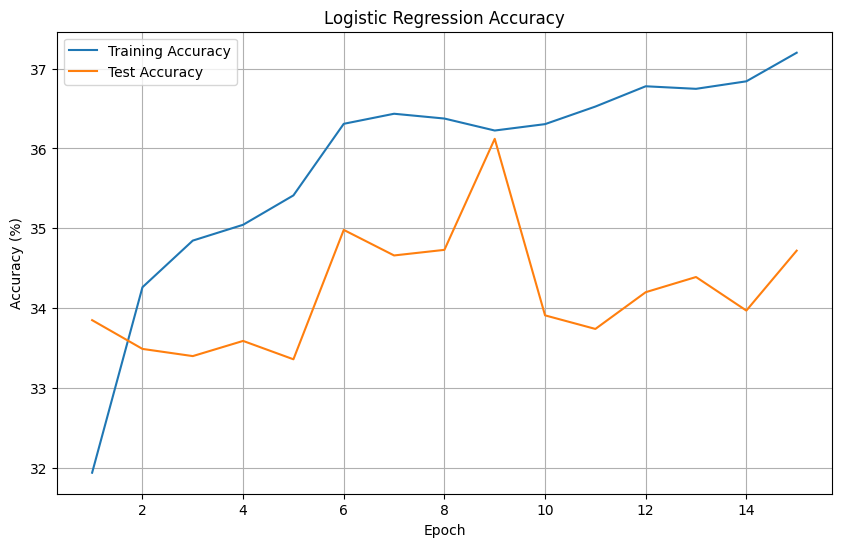

Logistic Regression - Best Hyperparameters: Learning Rate=0.01, Momentum=0.0
Logistic Regression - Final Test Accuracy: 34.72%


In [2]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(-1, 32*32*3) # Flatten the input
        return self.linear(x)

# Instantiate and train the network
input_size = 32 * 32 * 3
num_classes = 10
lr_model = LogisticRegression(input_size, num_classes).to(device)

lr_learning_rate = 0.01
lr_momentum = 0.0
lr_epochs = 15

lr_train_acc, lr_test_acc, lr_iterations = train_network(lr_model, trainloader, testloader, epochs=lr_epochs, learning_rate=lr_learning_rate, momentum=lr_momentum)
plot_accuracy(lr_train_acc, lr_test_acc, lr_iterations, 'Logistic Regression Accuracy')

print(f"Logistic Regression - Best Hyperparameters: Learning Rate={lr_learning_rate}, Momentum={lr_momentum}")
print(f"Logistic Regression - Final Test Accuracy: {lr_test_acc[-1]:.2f}%")

[1,  2000] loss: 1.870
[1,  4000] loss: 1.778
[1,  6000] loss: 1.758
[1,  8000] loss: 1.743
[1, 10000] loss: 1.723
[1, 12000] loss: 1.729
Epoch 1 - Training Accuracy: 38.87%, Test Accuracy: 41.64%
[2,  2000] loss: 1.680
[2,  4000] loss: 1.667
[2,  6000] loss: 1.667
[2,  8000] loss: 1.655
[2, 10000] loss: 1.685
[2, 12000] loss: 1.673
Epoch 2 - Training Accuracy: 43.94%, Test Accuracy: 42.45%
[3,  2000] loss: 1.591
[3,  4000] loss: 1.616
[3,  6000] loss: 1.607
[3,  8000] loss: 1.601
[3, 10000] loss: 1.653
[3, 12000] loss: 1.613
Epoch 3 - Training Accuracy: 46.44%, Test Accuracy: 46.33%
[4,  2000] loss: 1.520
[4,  4000] loss: 1.589
[4,  6000] loss: 1.567
[4,  8000] loss: 1.592
[4, 10000] loss: 1.587
[4, 12000] loss: 1.612
Epoch 4 - Training Accuracy: 48.17%, Test Accuracy: 46.01%
[5,  2000] loss: 1.477
[5,  4000] loss: 1.555
[5,  6000] loss: 1.514
[5,  8000] loss: 1.566
[5, 10000] loss: 1.542
[5, 12000] loss: 1.563
Epoch 5 - Training Accuracy: 49.83%, Test Accuracy: 45.40%
[6,  2000] loss

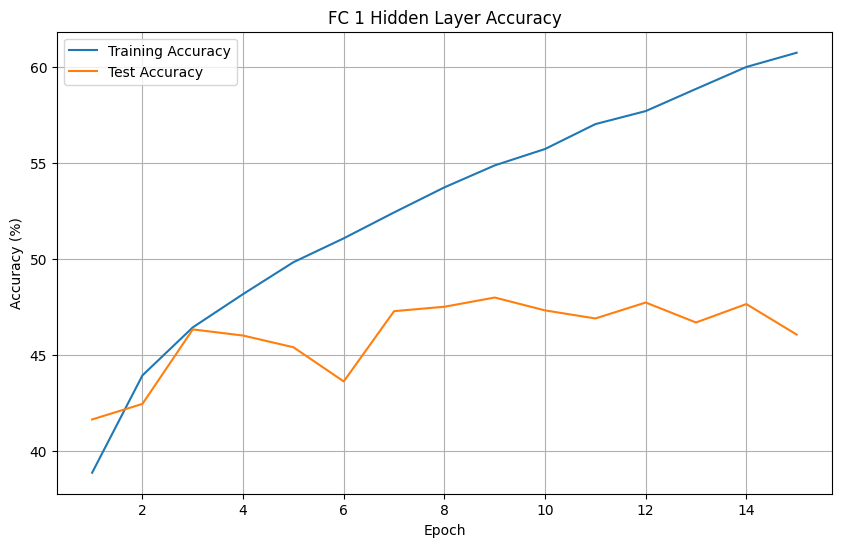

FC 1 Hidden Layer - Best Hyperparameters: Hidden Size=256, Learning Rate=0.01, Momentum=0.5
FC 1 Hidden Layer - Final Test Accuracy: 46.06%


In [4]:
class FC1Hidden(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FC1Hidden, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


input_size = 32 * 32 * 3
num_classes = 10
fc1_hidden_size = 256
fc1_model = FC1Hidden(input_size, fc1_hidden_size, num_classes).to(device)

# Hyperparameter search
fc1_learning_rate = 0.01
fc1_momentum = 0.5
fc1_epochs = 15

fc1_train_acc, fc1_test_acc, fc1_iterations = train_network(fc1_model, trainloader, testloader, epochs=fc1_epochs, learning_rate=fc1_learning_rate, momentum=fc1_momentum)
plot_accuracy(fc1_train_acc, fc1_test_acc, fc1_iterations, 'FC 1 Hidden Layer Accuracy')

print(f"FC 1 Hidden Layer - Best Hyperparameters: Hidden Size={fc1_hidden_size}, Learning Rate={fc1_learning_rate}, Momentum={fc1_momentum}")
print(f"FC 1 Hidden Layer - Final Test Accuracy: {fc1_test_acc[-1]:.2f}%")

[1,  2000] loss: 1.831
[1,  4000] loss: 1.710
[1,  6000] loss: 1.676
[1,  8000] loss: 1.689
[1, 10000] loss: 1.677
[1, 12000] loss: 1.704
Epoch 1 - Training Accuracy: 43.08%, Test Accuracy: 41.30%
[2,  2000] loss: 1.589
[2,  4000] loss: 1.621
[2,  6000] loss: 1.661
[2,  8000] loss: 1.664
[2, 10000] loss: 1.674
[2, 12000] loss: 1.681
Epoch 2 - Training Accuracy: 46.71%, Test Accuracy: 45.34%
[3,  2000] loss: 1.557
[3,  4000] loss: 1.559
[3,  6000] loss: 1.575
[3,  8000] loss: 1.605
[3, 10000] loss: 1.650
[3, 12000] loss: 1.657
Epoch 3 - Training Accuracy: 48.43%, Test Accuracy: 47.57%
[4,  2000] loss: 1.512
[4,  4000] loss: 1.533
[4,  6000] loss: 1.621
[4,  8000] loss: 1.573
[4, 10000] loss: 1.615
[4, 12000] loss: 1.623
Epoch 4 - Training Accuracy: 49.73%, Test Accuracy: 47.47%
[5,  2000] loss: 1.455
[5,  4000] loss: 1.527
[5,  6000] loss: 1.574
[5,  8000] loss: 1.599
[5, 10000] loss: 1.550
[5, 12000] loss: 1.600
Epoch 5 - Training Accuracy: 50.32%, Test Accuracy: 46.25%
[6,  2000] loss

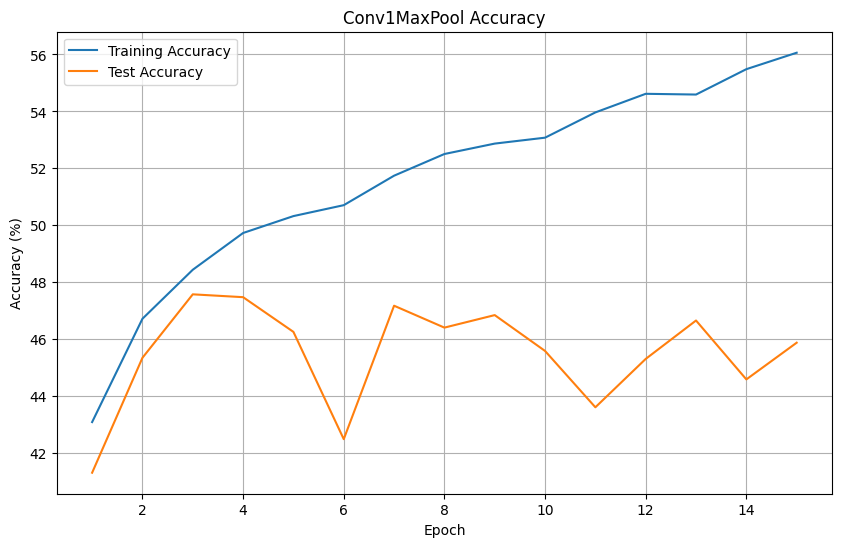

Conv1MaxPool - Best Hyperparameters: Num Filters=64, Filter Size=5, Pool Size=3, Learning Rate=0.01, Momentum=0.8
Conv1MaxPool - Final Test Accuracy: 45.87%


In [5]:
class Conv1MaxPool(nn.Module):
    def __init__(self, num_channels, num_filters, filter_size, pool_size, num_classes):
        super(Conv1MaxPool, self).__init__()
        self.conv1 = nn.Conv2d(num_channels, num_filters, kernel_size=filter_size)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=pool_size, stride=pool_size)
        # Calculate the output size after pooling
        def get_output_size(input_size, kernel_size, stride=1, padding=0, dilation=1):
            return (input_size - dilation * (kernel_size - 1) - 1 + 2 * padding) // stride + 1
        conv_out_size = get_output_size(32, filter_size)
        pooled_out_size = get_output_size(conv_out_size, pool_size, stride=pool_size)
        self.fc = nn.Linear(num_filters * pooled_out_size * pooled_out_size, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out)
        out = out.view(-1, self.num_flat_features(out))
        out = self.fc(out)
        return out

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Instantiate and train the network
num_channels = 3
num_classes = 10

conv1_num_filters = 64
conv1_filter_size = 5
conv1_pool_size = 14 //5+1

conv1_model = Conv1MaxPool(num_channels, conv1_num_filters, conv1_filter_size, conv1_pool_size, num_classes).to(device)

# Hyperparameter search
conv1_learning_rate = 0.01
conv1_momentum = 0.8
conv1_epochs = 15

conv1_train_acc, conv1_test_acc, conv1_iterations = train_network(conv1_model, trainloader, testloader, epochs=conv1_epochs, learning_rate=conv1_learning_rate, momentum=conv1_momentum)
plot_accuracy(conv1_train_acc, conv1_test_acc, conv1_iterations, 'Conv1MaxPool Accuracy')

print(f"Conv1MaxPool - Best Hyperparameters: Num Filters={conv1_num_filters}, Filter Size={conv1_filter_size}, Pool Size={conv1_pool_size}, Learning Rate={conv1_learning_rate}, Momentum={conv1_momentum}")
print(f"Conv1MaxPool - Final Test Accuracy: {conv1_test_acc[-1]:.2f}%")

Using device: cuda
automobile deer  ship  truck


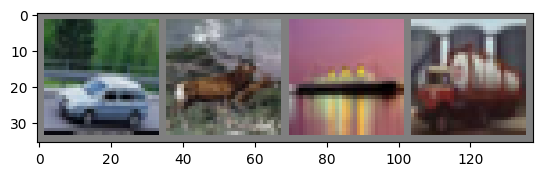

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load CIFAR-10 dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize some training images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
imshow(torchvision.utils.make_grid(images[:4]))

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.25)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.dropout3 = nn.Dropout(0.25)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.dropout4 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x)))))))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.bn4(self.conv4(F.relu(self.bn3(self.conv3(x)))))))
        x = self.dropout2(x)
        x = self.pool(F.relu(self.bn6(self.conv6(F.relu(self.bn5(self.conv5(x)))))))
        x = self.dropout3(x)
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)
        x = self.fc2(x)
        return x

net = Net().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [9]:
# Training loop
epochs = 50
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_loss = val_loss / len(testloader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')


Epoch [1/50], Training Loss: 1.4275, Training Accuracy: 47.32%, Validation Loss: 1.0150, Validation Accuracy: 63.68%
Epoch [2/50], Training Loss: 1.0539, Training Accuracy: 62.58%, Validation Loss: 0.8466, Validation Accuracy: 69.78%
Epoch [3/50], Training Loss: 0.9140, Training Accuracy: 68.14%, Validation Loss: 0.7235, Validation Accuracy: 74.75%
Epoch [4/50], Training Loss: 0.8324, Training Accuracy: 71.24%, Validation Loss: 0.7375, Validation Accuracy: 73.88%
Epoch [5/50], Training Loss: 0.7614, Training Accuracy: 73.66%, Validation Loss: 0.6373, Validation Accuracy: 77.75%
Epoch [6/50], Training Loss: 0.7088, Training Accuracy: 75.54%, Validation Loss: 0.6582, Validation Accuracy: 78.01%
Epoch [7/50], Training Loss: 0.6663, Training Accuracy: 77.06%, Validation Loss: 0.5791, Validation Accuracy: 79.87%
Epoch [8/50], Training Loss: 0.6283, Training Accuracy: 78.51%, Validation Loss: 0.5812, Validation Accuracy: 80.26%
Epoch [9/50], Training Loss: 0.5928, Training Accuracy: 79.63%, 

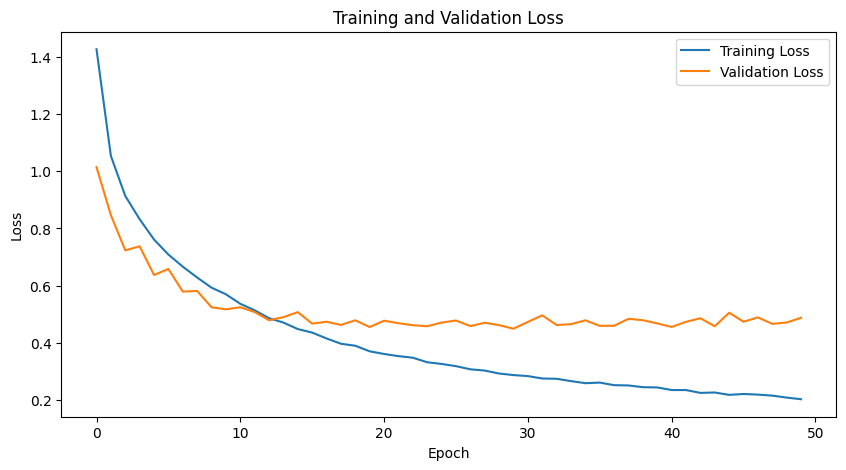

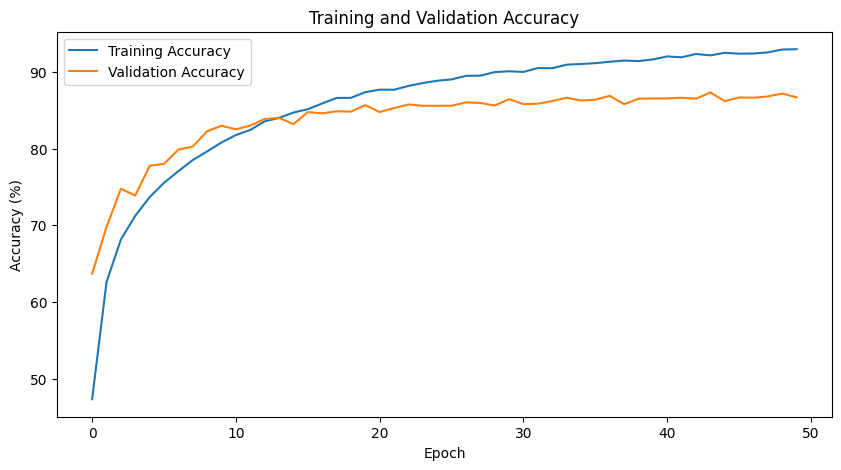

In [10]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

    airplane       0.88      0.89      0.88      1000
  automobile       0.95      0.93      0.94      1000
        bird       0.88      0.74      0.81      1000
         cat       0.81      0.67      0.73      1000
        deer       0.85      0.87      0.86      1000
         dog       0.76      0.83      0.79      1000
        frog       0.83      0.94      0.88      1000
       horse       0.88      0.93      0.90      1000
        ship       0.92      0.94      0.93      1000
       truck       0.91      0.94      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



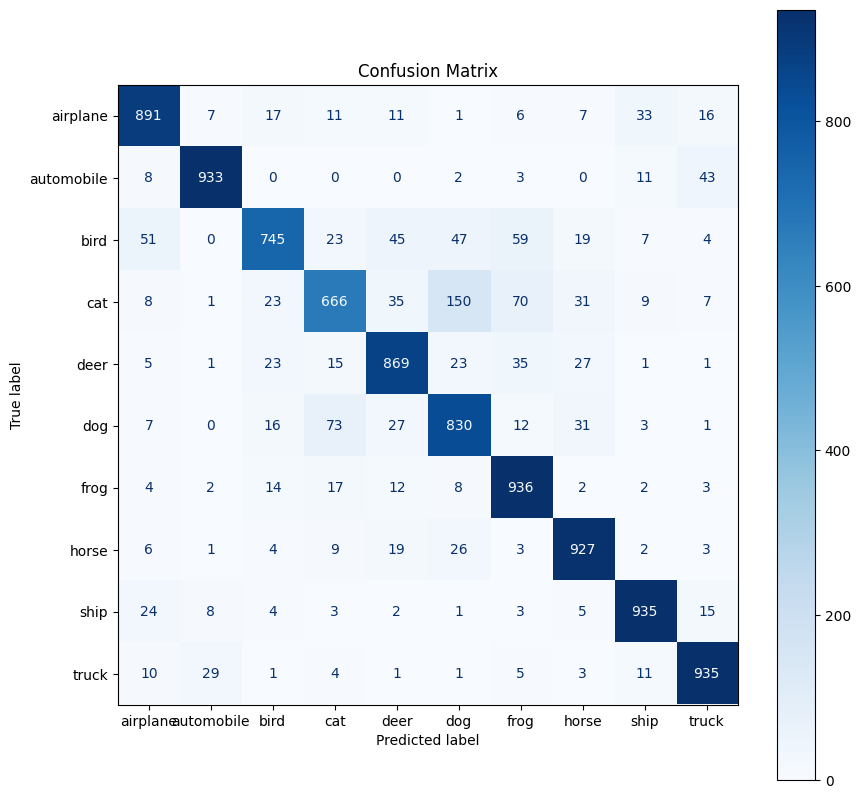

In [11]:
# Evaluation on the test set
net.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print('\nClassification Report:')
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()